In [1]:
import pandas as pd 
import folium
import numpy as np 
from folium.plugins import MarkerCluster
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams, style, font_manager, rc
import matplotlib as mpl
from haversine import haversine

In [2]:
# 한글폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [3]:
cctv = pd.read_csv('./data/부산광역시 부산진구_CCTV.csv')
cctv

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치연월,관리기관전화번호,위도,경도,데이터기준일자
0,부산광역시 부산진구청,신암로83번길 13,범천2동 1252-70,다목적,1,200,360도 전방면,30,NaN,051-605-6321,35.148287,129.053076,2021-10-08
1,부산광역시 부산진구청,동평로127번길 52,부암3동 365-1,다목적,1,200,360도 전방면,30,NaN,051-605-6321,35.168618,129.042819,2021-10-08
2,부산광역시 부산진구청,동평로131번길 48,부암1동 320-73,다목적,1,200,360도 전방면,30,NaN,051-605-6321,35.167787,129.045243,2021-10-08
3,부산광역시 부산진구청,개금본동로66번길 11,개금3동 412-13,다목적,1,200,360도 전방면,30,NaN,051-605-6321,35.157692,129.020222,2021-10-08
4,부산광역시 부산진구청,가야대로703번길 16,당감2동 93-1,다목적,1,200,360도 전방면,30,NaN,051-605-6321,35.158192,129.047562,2021-10-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,부산광역시 부산진구청,전포동 보아마트 부근,중앙대로 792,차량방범,4,200,NaN,30,NaN,051-605-4566,35.162126,129.063412,2021-10-08
1004,부산광역시 부산진구청,당감주공3단지 상가 앞,당감서로 169,차량방범,3,200,NaN,30,NaN,051-605-4566,35.171750,129.026709,2021-10-08
1005,부산광역시 부산진구청,전포동서면아이파크 아파트,동성로 50,차량방범,3,200,NaN,30,NaN,051-605-4566,35.154562,129.068430,2021-10-08
1006,부산광역시 부산진구청,양정초등학교 주변,중앙대로941번길 24,차량방범,5,200,NaN,30,NaN,051-605-4566,35.174808,129.070047,2021-10-08


In [4]:
columns = ['소재지도로명주소', '위도', '경도']

cctv = cctv[columns].copy()
cctv

,소재지도로명주소,위도,경도
0,신암로83번길 13,35.148287,129.053076
1,동평로127번길 52,35.168618,129.042819
2,동평로131번길 48,35.167787,129.045243
3,개금본동로66번길 11,35.157692,129.020222
4,가야대로703번길 16,35.158192,129.047562
...,...,...,...
1003,전포동 보아마트 부근,35.162126,129.063412
1004,당감주공3단지 상가 앞,35.171750,129.026709
1005,전포동서면아이파크 아파트,35.154562,129.068430
1006,양정초등학교 주변,35.174808,129.070047


In [5]:
cctv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   소재지도로명주소  1008 non-null   object 
 1   위도        1008 non-null   float64
 2   경도        1008 non-null   float64
dtypes: float64(2), object(1)
memory usage: 23.8+ KB


In [6]:
cafe = pd.read_csv('C:/localRepository/Five-Gs_BigData/cafe/busan_cafe.csv', encoding='utf-8')
cafe

,Unnamed: 0,상호명,상권업종중분류명,표준산업분류명,도로명주소,시군구명,경도,위도,Dbscan_50m,Dbscan_100m
0,15,투썸플레이스,커피점/카페,비알콜 음료점업,부산광역시 남구 수영로 286,남구,129.097701,35.135963,0,0
1,69,더리터,커피점/카페,비알콜 음료점업,부산광역시 수영구 수영로 396-1,수영구,129.107896,35.141748,0,0
2,97,비움카페,커피점/카페,비알콜 음료점업,부산광역시 기장군 기장읍 용궁길 68,기장군,129.221668,35.189328,-1,-1
3,104,로카페,커피점/카페,비알콜 음료점업,부산광역시 기장군 정관읍 정관로 350,기장군,129.164382,35.335824,-1,-1
4,229,콩카페,커피점/카페,비알콜 음료점업,부산광역시 북구 시랑로 137,북구,129.010423,35.195485,-1,-1
...,...,...,...,...,...,...,...,...,...,...
6910,152863,반달커피,커피점/카페,비알콜 음료점업,부산광역시 동래구 사직북로19번길 13,동래구,129.059828,35.197325,9,-1
6911,152867,고품격커피공장,커피점/카페,비알콜 음료점업,부산광역시 사하구 신산북로 41,사하구,128.968087,35.092286,-1,-1
6912,152868,카페,커피점/카페,비알콜 음료점업,부산광역시 해운대구 송정해변로 40,해운대구,129.201600,35.180614,-1,-1
6913,152895,요기,커피점/카페,비알콜 음료점업,부산광역시 금정구 무학송로 105,금정구,129.093307,35.240528,2,-1


In [7]:
cafe = cafe[['도로명주소', '시군구명', '위도', '경도']]
# cafe.columns = ['도로명주소', '시군구명', '위도', '경도']
# cafe = cafe[columns].copy()
cafe

,도로명주소,시군구명,위도,경도
0,부산광역시 남구 수영로 286,남구,35.135963,129.097701
1,부산광역시 수영구 수영로 396-1,수영구,35.141748,129.107896
2,부산광역시 기장군 기장읍 용궁길 68,기장군,35.189328,129.221668
3,부산광역시 기장군 정관읍 정관로 350,기장군,35.335824,129.164382
4,부산광역시 북구 시랑로 137,북구,35.195485,129.010423
...,...,...,...,...
6910,부산광역시 동래구 사직북로19번길 13,동래구,35.197325,129.059828
6911,부산광역시 사하구 신산북로 41,사하구,35.092286,128.968087
6912,부산광역시 해운대구 송정해변로 40,해운대구,35.180614,129.201600
6913,부산광역시 금정구 무학송로 105,금정구,35.240528,129.093307


In [38]:
cafe = cafe[cafe['시군구명'] == '부산진구']
cafe

,도로명주소,시군구명,위도,경도
25,부산광역시 부산진구 새싹로 159,부산진구,35.170424,129.049874
30,부산광역시 부산진구 가야공원로 28,부산진구,35.151000,129.029825
111,부산광역시 부산진구 전포대로256번길 7,부산진구,35.159503,129.065967
135,부산광역시 부산진구 동평로420번길 20-1,부산진구,35.172495,129.069660
154,부산광역시 부산진구 가야공원로 61,부산진구,35.147913,129.030258
...,...,...,...,...
6857,부산광역시 부산진구 중앙대로 801,부산진구,35.163474,129.063362
6867,부산광역시 부산진구 동성로 27,부산진구,35.152867,129.068196
6890,부산광역시 부산진구 가야대로 772,부산진구,35.156810,129.056438
6899,부산광역시 부산진구 동성로71번길 32,부산진구,35.156982,129.066614


초기 후보군:  1008


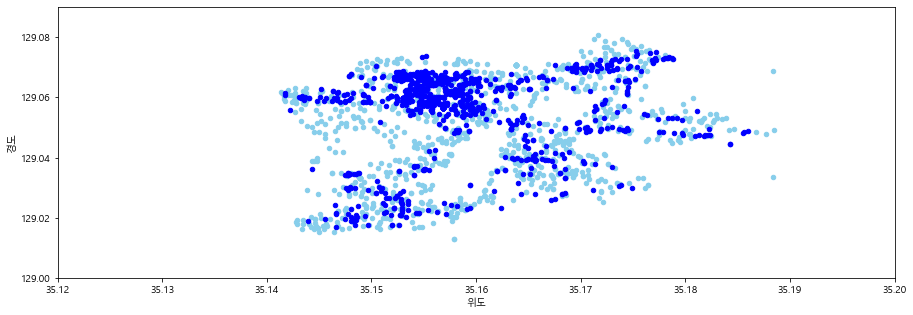

In [39]:
fig, ax = plt.subplots(figsize=(15,5))
plt.xlim(35.12, 35.20)
plt.ylim(129.00, 129.09)
cctv[['위도', '경도']].plot.scatter(x='위도', y='경도', ax=ax, color='skyblue')
cafe[['위도', '경도']].plot.scatter(x='위도', y='경도', ax=ax, color='blue')
print("초기 후보군: ",len(cctv))

In [29]:
# cafe_zip = zip(cafe['위도'], cafe['경도'])
# type(cafe_zip)
# cafe['위도']
cafe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 25 to 6908
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   도로명주소   876 non-null    object 
 1   시군구명    876 non-null    object 
 2   위도      876 non-null    float64
 3   경도      876 non-null    float64
dtypes: float64(2), object(2)
memory usage: 34.2+ KB


In [40]:
addresses = []
lats = []
lons = []

for address,lat,lon in zip(cctv['소재지도로명주소'], cctv['위도'], cctv['경도']):
    in50m = False
    candidate = (lat, lon)
    for cafe_lat,cafe_lon in zip(cafe['위도'], cafe['경도']):
        cafe_50 = (cafe_lat, cafe_lon)
        if haversine(candidate, cafe_50)*1000 <= 50: # 50m 
            in50m=True
            break
    
    if in50m == False:
        addresses.append(address)
        lats.append(lat)
        lons.append(lon)



In [41]:
candidates_far = pd.DataFrame([])
candidates_far['도로명주소']=addresses
candidates_far['위도']=lats
candidates_far['경도']=lons

현재 후보군:  759


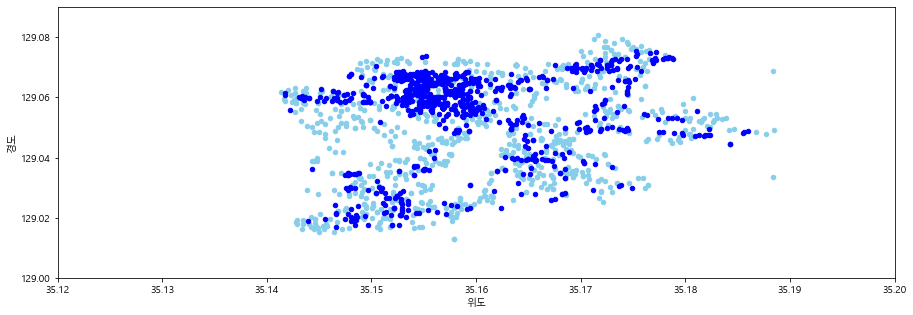

In [42]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.xlim(35.12, 35.20)
plt.ylim(129.00, 129.09)
candidates_far.plot.scatter(x='위도',y='경도',ax=ax,color='skyblue')
cafe.plot.scatter(x='위도',y='경도',ax=ax,color='blue')
print("현재 후보군: ",len(candidates_far))

In [43]:
#카페와의 최소 거리 계산
distance_cafe = []

for address,lat,lon in zip(candidates_far['도로명주소'], candidates_far['위도'],candidates_far['경도']):
    minimum = 1000000
    candidate = (lat, lon)
    for cafe_lat,cafe_lon in zip(cafe['위도'],cafe['경도']):
        cafe_15 = (cafe_lat, cafe_lon)
        if haversine(candidate, cafe_15)*1000 < minimum:
            minimum = haversine(candidate, cafe_15)*1000
    distance_cafe.append(minimum)

In [44]:
# 연령별 보행속도의 평균 구하기
walk = np.average([1.3,1.4,1.49,1.35,1.41,1.41,1.61,1.32])
walk

1.41125

In [45]:
# 15분보다 멀리 있는 후보군은 제외.
candidates_far['distance_cafe'] = distance_cafe
candidates_far=candidates_far[candidates_far['distance_cafe']<=(5*60*walk)]

현재 후보군:  728


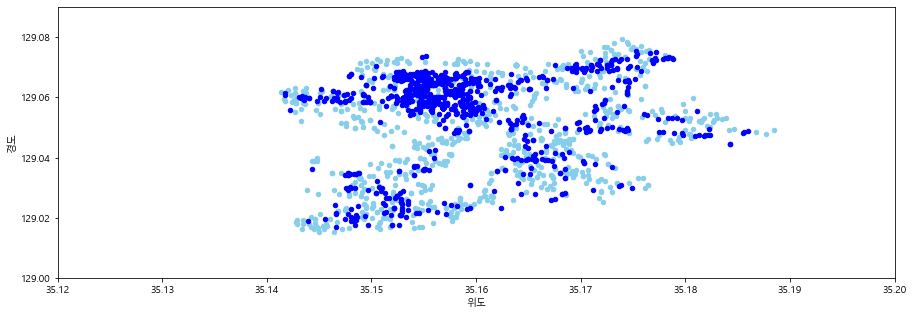

In [46]:
fig, ax = plt.subplots(figsize=(15,5))
plt.xlim(35.12, 35.20)
plt.ylim(129.00, 129.09)
candidates_far.plot.scatter(x='위도',y='경도',ax=ax,color='skyblue')
cafe.plot.scatter(x='위도',y='경도',ax=ax,color='blue')
print("현재 후보군: ",len(candidates_far))

In [48]:
len(candidates_far)

728